# Quicksort
Below is a reference implementation of quicksort that counts the number of compares that it performs as it runs.

In [1]:
import random
import numpy as np

def randomized_quicksort(arr, low, high, comparisons):
    if low < high:
        pi, comp = randomized_partition(arr, low, high, comparisons)
        comparisons[0] += comp
        randomized_quicksort(arr, low, pi - 1, comparisons)
        randomized_quicksort(arr, pi + 1, high, comparisons)
    return comparisons[0]

def randomized_partition(arr, low, high, comparisons):
    # Choose a random pivot index
    pivot_index = random.randint(low, high)
    # Swap the random pivot with the last element
    arr[high], arr[pivot_index] = arr[pivot_index], arr[high]

    # Now proceed with the standard partition logic
    i = low - 1
    pivot = arr[high]
    comp = 0
    for j in range(low, high):
        comp += 1  # Comparison with pivot
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1, comp

def sort_and_count(arr):
    comparisons = [0]
    count = randomized_quicksort(arr, 0, len(arr) - 1, comparisons)
    return arr, count

We are interested in performing a large number of quicksort trials - and recording the number of compares performed in each - so as to understand the distribution of this random variable

In [2]:
n = 10000
random_array = [random.randint(0, n) for _ in range(n)]  # Larger random array
counts = []
n_trials = 1000
for i in range(n_trials):
    _, n_comparisons = sort_and_count(random_array)
    counts.append(n_comparisons)

As discussed in our in-class analysis, the expected runtime of quicksort is 
$$ E[T] = (2n + 2) H_n - 4n, $$
where $H_n$ is the harmonic number
$$
H_n = \sum_{k=1}^n \frac{1}{k}.
$$


In [3]:
def H(n, m=1):
    """
    Calculates the nth generalized harmonic number of order m.

    Args:
        n: The number of terms to sum (positive integer).
        m: The order of the harmonic number (integer, can be positive, negative, or zero).

    Returns:
        The nth generalized harmonic number of order m.
    """
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n must be a positive integer")
    
    total = 0
    for k in range(1, n + 1):
        total += 1 / (k ** m)
    return total

Comparing the theoretical expectation and measured average we find very good agreement, as shown below alongside the histogram of observed runtimes.

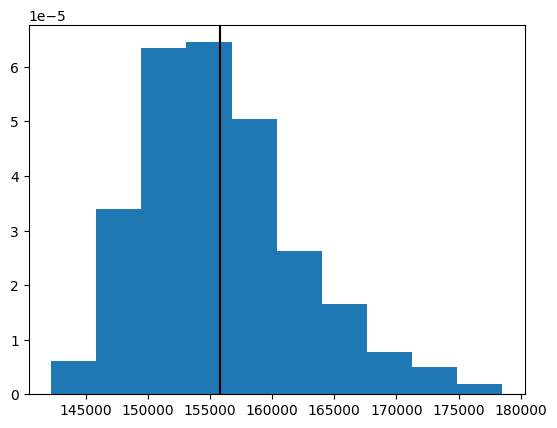

In [6]:
import matplotlib.pyplot as plt
plt.hist(counts,density=True)
empirical_expectation = np.mean(counts)
k = np.linspace(1,n,n)
theoretical_expectation = (2*n + 2)*H(n) - 4*n

plt.axvline(empirical_expectation,color='red',label='Emperical Mean')
plt.axvline(theoretical_expectation,color='black',label='Theoretical Expectation')

We are also interested in characterizing bounds on the tail distribution of runtime - i.e. the probability that the runtime exceeds some particular threshold.  For Markov's bound, we have that
$$
P(T \ge a E[T]) \le \frac{1}{a}.
$$

In [7]:
a = np.linspace(1,2,101)
T_markov = a*theoretical_expectation
markov_bound = 1./a

For Chebyshev's bound, we have that
$$
P(T \ge E[T] + a \mathrm{Var}[T]^{\frac{1}{2}}) \le \frac{1}{2a^2},
$$
where the variance of the runtime is 
$$
\mathrm{Var}[T] = 7n^2 - 4(n+1)^2H_n^{(2)} - 2(n+1)H_n + 13n,
$$
where $H_n^{(j)}$ is the $j-$th order harmonic number
$$
H_n^{(j)} = \sum_{k=1}^n \frac{1}{k^j}.
$$
 

In [8]:
variance = 7*n**2 - 4*(n+1)**2*H(n,m=2) - 2*(n+1)*H(n) + 13*n
std_dev = variance**0.5
a = np.linspace(1,6,100)
T_chebyshev = theoretical_expectation + a*std_dev
chebyshev_bound = 1./(2*a**2)

We can plot the resulting bounds, alongside the observed exceedance probability below.

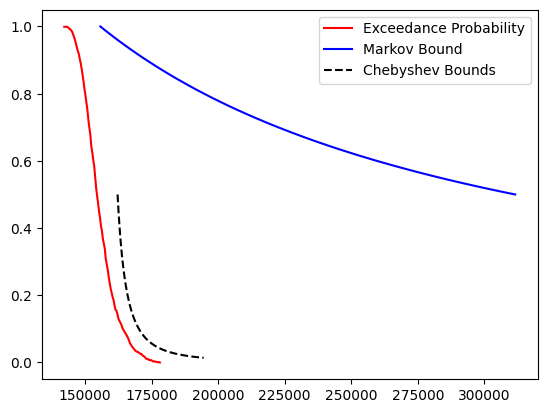

In [9]:
c,bins = np.histogram(counts,100)
exceedance_probability = 1 - np.cumsum(c)/c.sum()
plt.plot(bins[:-1],exceedance_probability,'r-',label='Exceedance Probability')

plt.plot(T_markov,markov_bound,'b-',label='Markov Bound')

plt.plot(T_chebyshev,chebyshev_bound,'k--',label='Chebyshev Bounds')

plt.legend()